<p style='color:red;'>Importimg relevant pajmim</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
raw_data=pd.read_csv('Mall_Customers.csv')
df=raw_data.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
# We have only one categorical variable i.e Age

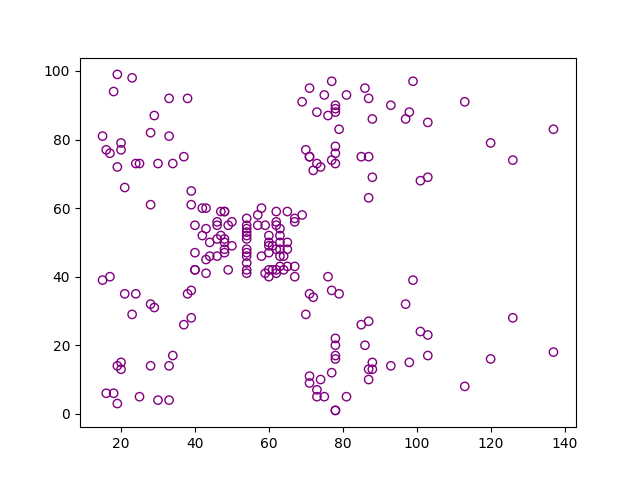

In [5]:
features=df[['Annual Income (k$)','Spending Score (1-100)']].values
plt.figure()
plt.clf()
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],marker='o', facecolors='none', edgecolors='purple')
plt.show()

In [6]:
## Writing the KMeans algorithm

In [7]:
# This function randomly returns the cluster points from the unlabelled data
def get_cluster_centroids(X,K):
    # K is the number of clusters
    # X is the array of features to which the closest clusters will be assigned
    # m is the number of data pts (unlabelled data)
    # n is the no. of features
    m,n=X.shape
    cluster_centroids=np.zeros((K,n))
   ## Randomly selecting K data points as the cluster cenrtroids
    rand=int(np.random.uniform(0,m/10))
    for i in range(K):
        cluster_centroids[i]=X[int(rand+(m/(i+2)))]
    return cluster_centroids   

In [8]:
K=7
centroids=get_cluster_centroids(features,K)

In [9]:
def get_C(X,centroids):
    # centroids array has the number of initializaed centoids equal to K shape=(K,n)
    # X is unlabelled data
    m,n=X.shape
    c=np.zeros(m)
    distances=np.zeros((m,len(centroids)))
    # finding the distance of each centroid center from all the unlabelled points
    for i in range(len(centroids)):
        distance=np.zeros(m)
        diff=X-centroids[i]
        for j in range(n):
            distance+=(diff[:,j]**2)
        distance=np.power(distance,0.5)
        distances[:,i]=distance
    for i in range(distances.shape[0]):
        c[i]=np.argmin(distances[i])
    return c    

In [10]:
C=get_C(features,centroids)

In [11]:
np.unique(C)

array([0., 1., 2., 3., 4., 5., 6.])

In [12]:
def move_centroids(X,C,K):
    clusters=np.unique(C).astype(int)
    m,n=X.shape
    new_centroids=np.zeros((K,n))
    #print(new_centroids.shape)
    for cluster in clusters:
        data_indices=[i for i in range(len(C)) if C[i]==cluster]
        new_centroids[cluster]=np.sum(X[data_indices],axis=0)/len(data_indices)
    return new_centroids

In [13]:
move_centroids(features,C,K)

array([[80.17475728, 47.62135922],
       [57.        , 57.23809524],
       [52.07142857, 63.64285714],
       [47.66666667, 44.22222222],
       [41.        , 45.25      ],
       [28.07692308, 76.23076923],
       [26.30434783, 20.91304348]])

In [14]:
## Lets us finally run the K Means Clustering Algorithm

In [15]:
def compute_cost(X,C,centroids):
    m,n=X.shape
    mu_c=np.zeros((m,n))
    for i,c in zip(range(m),C):
        mu_c[i]=centroids[c]
    cost=(1/m)*np.sum(np.square(X-mu_c))
    return cost

In [16]:
def get_clusters(features,K,iterations=100):
    centroids=get_cluster_centroids(features,K)
    J_hist=[]
    for i in range(iterations):
        C=get_C(features,centroids).astype(int)
        centroids=move_centroids(features,C,K)
        J_hist.append(compute_cost(features,C,centroids))
    #print('Final Cost: {cost}'.format(cost=J_hist[-1]))
    return C,centroids,J_hist[-1]

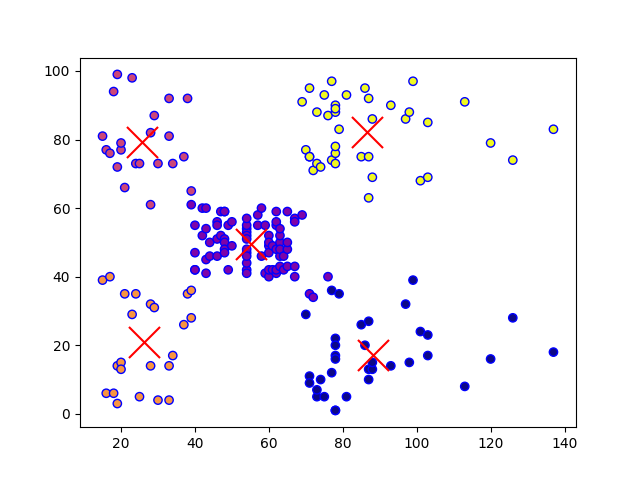

In [21]:

K=5

C,centroids,final_cost=get_clusters(features,K)

## This is only ppossible in case of a 2D plot
plt.figure()
plt.clf()
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],marker='o', facecolors='none', edgecolors='blue',c=C,cmap='plasma')
for i in range(centroids.shape[0]):
    plt.scatter(centroids[i][0],centroids[i][1],marker='x',  c='red',s=500)

plt.show()

In [18]:
centroids

array([[ 89.40625   ,  15.59375   ],
       [ 78.03571429,  81.89285714],
       [ 47.51162791,  51.79069767],
       [ 63.72093023,  46.1627907 ],
       [ 25.0952381 ,  80.04761905],
       [ 25.72727273,  20.22727273],
       [108.18181818,  82.72727273]])

## Lets run the Algorithm for different K values

In [19]:
final_costs=[]
K_max=10
costs=[]

for j in range(200):
    C,centroids,final_cost=get_clusters(features,i)
    final_costs.append(final_cost)
cost=np.min(final_costs)
cost

187.2799227758014

In [20]:
C,centroids,final_cost=get_clusters(features,7)
final_cost

177.98409295888217